# Anupama B Nagarale

# Importing Required libraries

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
from sklearn import preprocessing
from scipy.stats import f_oneway

#  Importing Data set 

In [83]:
df= pd.read_excel("Cab_project.xlsx")
print(df)

    Age       Ge  Avscp  Dculm  lacar   pcs  osp              ocs   cstu  \
0     23  Female    540      3      6  65.0    8           Weekly    Ola   
1     15    Male    500      2      3  85.0    6           Weekly   Uber   
2     22  Female    410      2      5  25.0   25           Weekly    Ola   
3     23  Female   1500      4      6  30.0    5           Weekly    Ola   
4     26  Female   1000      3      8  70.0    6           Weekly    Ola   
..   ...     ...    ...    ...    ...   ...  ...              ...    ...   
62    25  Female    500      3      3  50.0    2           Weekly  Other   
63    25  Female   1000      2      5  30.0    4  Whenever needed    Ola   
64    24  Female   1000      4      5  10.0    2           Weekly   Uber   
65    23  Female   1000      6     15  65.0    3            Daily   Uber   
66    25  Female    400      5      3  10.0    2  Whenever needed    Ola   

    tpsc  ...       Safety  Drbe Swpo  which Convcd       Dedl Cshdex online  \
0     6

In [84]:
df.head()

,Age,Ge,Avscp,Dculm,lacar,pcs,osp,ocs,cstu,tpsc,...,Safety,Drbe,Swpo,which,Convcd,Dedl,Cshdex,online,prfu,Dwelt
0,23,Female,540,3,6,65.0,8,Weekly,Ola,60,...,2 to 5,4,yes,Other,Yes,Often,2,20,No,Yes
1,15,Male,500,2,3,85.0,6,Weekly,Uber,75,...,6 to 10,3,yes,Ola,Yes,Sometimes,2,24,No,Maybe
2,22,Female,410,2,5,25.0,25,Weekly,Ola,54,...,6 to 10,4,yes,Uber,Yes,Rarely,3,6,No,No
3,23,Female,1500,4,6,30.0,5,Weekly,Ola,30,...,Less than 2,3,yes,Ola,No,Often,2,6,No,Maybe
4,26,Female,1000,3,8,70.0,6,Weekly,Ola,70,...,2 to 5,3,yes,Uber,No,Sometimes,3,4,Yes,Yes


In [154]:
df.head(50)

,Age,Ge,Avscp,Dculm,lacar,osp,ocs,cstu,tpsc,overlm,...,Safety,Drbe,Swpo,which,Convcd,Dedl,Cshdex,online,prfu,Dwelt
0,23,0,540,3,6,8,3,0,60,12,...,0,4,1,1,2,2,2,20,0,2
1,15,1,500,2,3,6,3,2,75,9,...,1,3,1,0,2,4,2,24,0,0
2,22,0,410,2,5,25,3,0,54,52,...,1,4,1,2,2,3,3,6,0,1
3,23,0,1500,4,6,5,3,0,30,5,...,2,3,1,0,1,2,2,6,0,0
4,26,0,1000,3,8,6,3,0,70,7,...,0,3,1,2,1,4,3,4,1,2
5,24,0,300,3,5,2,3,2,50,2,...,2,4,1,2,2,4,3,5,0,2
6,22,1,150,2,15,6,4,1,25,0,...,2,3,1,1,1,4,3,2,0,1
7,25,0,600,2,3,2,4,0,70,3,...,2,4,0,0,1,3,2,2,1,0
8,26,1,1000,3,6,3,3,0,35,2,...,2,3,1,2,1,4,3,3,1,0
9,28,1,200,0,5,2,4,0,2,0,...,3,3,0,0,2,1,2,2,1,0


# label encoding

In [86]:
label_encoder = preprocessing.LabelEncoder()

In [87]:
df['Swpo']= label_encoder.fit_transform(df['Swpo'])
  
df['Swpo'].unique()

array([1, 0])

Gender

In [88]:
df['Ge']= label_encoder.fit_transform(df['Ge'])
  
df['Ge'].unique()

array([0, 1])

How often do you use cab services?: ocs

In [89]:
df['ocs']= label_encoder.fit_transform(df['ocs'])
  
df['ocs'].unique()

array([3, 4, 0, 1, 2])

#how many times Have you ever faced any safety concerns while traveling in a cab in Bangalore? unsafe

In [90]:
df['Safety']= label_encoder.fit_transform(df['Safety'])
  
df['Safety'].unique()

array([0, 1, 2, 3])

#If yes, which service did you switch to? Which

In [91]:
df['which']= label_encoder.fit_transform(df['which'])
  
df['which'].unique()

array([1, 0, 2])

#Have you ever had a conversation with a cab driver about their experience and challenges as a driver in Bangalore? Convcd

In [92]:
df['Convcd']= label_encoder.fit_transform(df['Convcd'])
  
df['Convcd'].unique()

array([2, 1, 0])

#How often have you experienced a delay due to the cab driver taking a longer route than necessary? Dedl

In [93]:
df['Dedl']= label_encoder.fit_transform(df['Dedl'])
  
df['Dedl'].unique()

array([2, 4, 3, 1, 0])

The cab service availability on 24*7 customer service at reasonable price with you ? prfu

In [94]:
df['prfu']= label_encoder.fit_transform(df['prfu'])
  
df['prfu'].unique()

array([0, 1])

#Do you feel that cab drivers in Bangalore are well-trained and knowledgeable about the routes and locations in the city? Dwelt

In [95]:
df['Dwelt']= label_encoder.fit_transform(df['Dwelt'])
  
df['Dwelt'].unique()

array([2, 0, 1])

Which cab services do you typically use?: cstu

In [96]:
df['cstu']= label_encoder.fit_transform(df['cstu'])
  
df['cstu'].unique()

array([0, 2, 1])

In [97]:
df.head(10)

,Age,Ge,Avscp,Dculm,lacar,pcs,osp,ocs,cstu,tpsc,...,Safety,Drbe,Swpo,which,Convcd,Dedl,Cshdex,online,prfu,Dwelt
0,23,0,540,3,6,65.0,8,3,0,60,...,0,4,1,1,2,2,2,20,0,2
1,15,1,500,2,3,85.0,6,3,2,75,...,1,3,1,0,2,4,2,24,0,0
2,22,0,410,2,5,25.0,25,3,0,54,...,1,4,1,2,2,3,3,6,0,1
3,23,0,1500,4,6,30.0,5,3,0,30,...,2,3,1,0,1,2,2,6,0,0
4,26,0,1000,3,8,70.0,6,3,0,70,...,0,3,1,2,1,4,3,4,1,2
5,24,0,300,3,5,50.0,2,3,2,50,...,2,4,1,2,2,4,3,5,0,2
6,22,1,150,2,15,25.0,6,4,1,25,...,2,3,1,1,1,4,3,2,0,1
7,25,0,600,2,3,70.0,2,4,0,70,...,2,4,0,0,1,3,2,2,1,0
8,26,1,1000,3,6,60.0,3,3,0,35,...,2,3,1,2,1,4,3,3,1,0
9,28,1,200,0,5,2.0,2,4,0,2,...,3,3,0,0,2,1,2,2,1,0


# Checking Null values

In [98]:
df.isnull()

,Age,Ge,Avscp,Dculm,lacar,pcs,osp,ocs,cstu,tpsc,...,Safety,Drbe,Swpo,which,Convcd,Dedl,Cshdex,online,prfu,Dwelt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
df.isnull().sum()

Age       0
Ge        0
Avscp     0
Dculm     0
lacar     0
pcs       0
osp       0
ocs       0
cstu      0
tpsc      0
overlm    0
Exc       0
cdcan     0
Drd       0
Safety    0
Drbe      0
Swpo      0
which     0
Convcd    0
Dedl      0
Cshdex    0
online    0
prfu      0
Dwelt     0
dtype: int64

# Drop

In [100]:
df.drop('pcs', axis = 1, inplace = True)

In [101]:
print(df)

    Age   Ge  Avscp  Dculm  lacar  osp  ocs  cstu  tpsc  overlm  ...  Safety  \
0     23   0    540      3      6    8    3     0    60      12  ...       0   
1     15   1    500      2      3    6    3     2    75       9  ...       1   
2     22   0    410      2      5   25    3     0    54      52  ...       1   
3     23   0   1500      4      6    5    3     0    30       5  ...       2   
4     26   0   1000      3      8    6    3     0    70       7  ...       0   
..   ...  ..    ...    ...    ...  ...  ...   ...   ...     ...  ...     ...   
62    25   0    500      3      3    2    3     1    75       3  ...       0   
63    25   0   1000      2      5    4    4     0    30       0  ...       2   
64    24   0   1000      4      5    2    3     2    10       5  ...       1   
65    23   0   1000      6     15    3    1     2    65       4  ...       2   
66    25   0    400      5      3    2    4     0    10       2  ...       2   

   Drbe Swpo  which  Convcd  Dedl  Cshd

In [102]:
df.head()

,Age,Ge,Avscp,Dculm,lacar,osp,ocs,cstu,tpsc,overlm,...,Safety,Drbe,Swpo,which,Convcd,Dedl,Cshdex,online,prfu,Dwelt
0,23,0,540,3,6,8,3,0,60,12,...,0,4,1,1,2,2,2,20,0,2
1,15,1,500,2,3,6,3,2,75,9,...,1,3,1,0,2,4,2,24,0,0
2,22,0,410,2,5,25,3,0,54,52,...,1,4,1,2,2,3,3,6,0,1
3,23,0,1500,4,6,5,3,0,30,5,...,2,3,1,0,1,2,2,6,0,0
4,26,0,1000,3,8,6,3,0,70,7,...,0,3,1,2,1,4,3,4,1,2


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     67 non-null     int64 
 1   Ge      67 non-null     int32 
 2   Avscp   67 non-null     int64 
 3   Dculm   67 non-null     int64 
 4   lacar   67 non-null     int64 
 5   osp     67 non-null     int64 
 6   ocs     67 non-null     int32 
 7   cstu    67 non-null     int32 
 8   tpsc    67 non-null     int64 
 9   overlm  67 non-null     int64 
 10  Exc     67 non-null     int64 
 11  cdcan   67 non-null     object
 12  Drd     67 non-null     object
 13  Safety  67 non-null     int32 
 14  Drbe    67 non-null     int64 
 15  Swpo    67 non-null     int32 
 16  which   67 non-null     int32 
 17  Convcd  67 non-null     int32 
 18  Dedl    67 non-null     int32 
 19  Cshdex  67 non-null     int64 
 20  online  67 non-null     int64 
 21  prfu    67 non-null     int32 
 22  Dwelt   67 non-null     int3

# Plottings

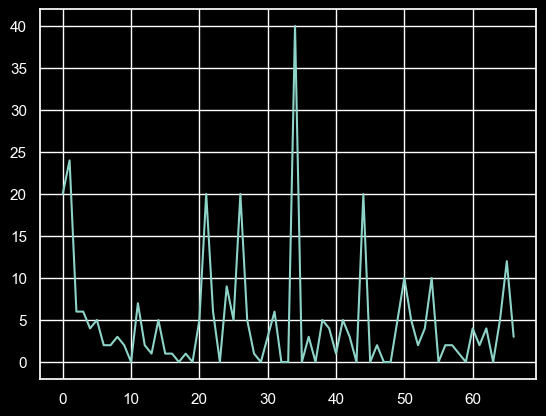

In [104]:
plt.plot(df.online)

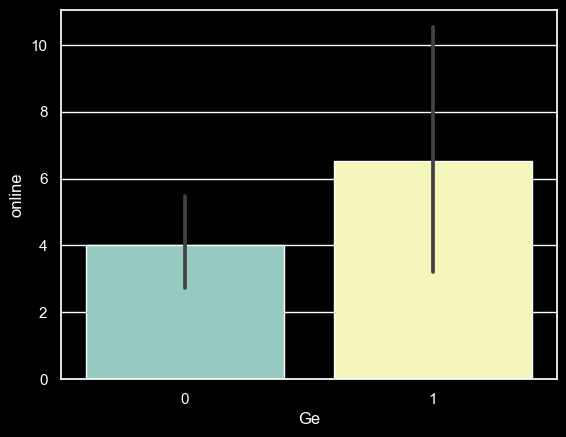

In [105]:
import seaborn as sns
sns.barplot(data=df, x='Ge', y='online')
plt.show()

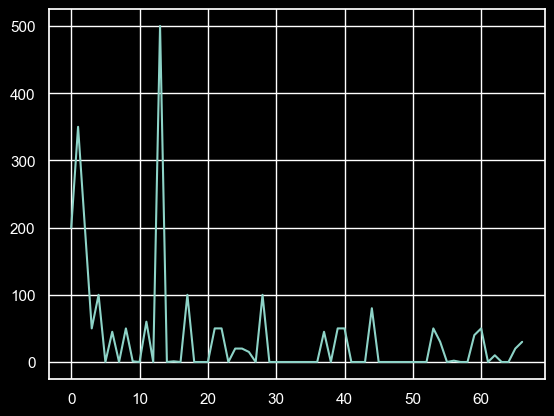

In [106]:
plt.plot(df.Exc)

<Axes: xlabel='Exc', ylabel='Count'>

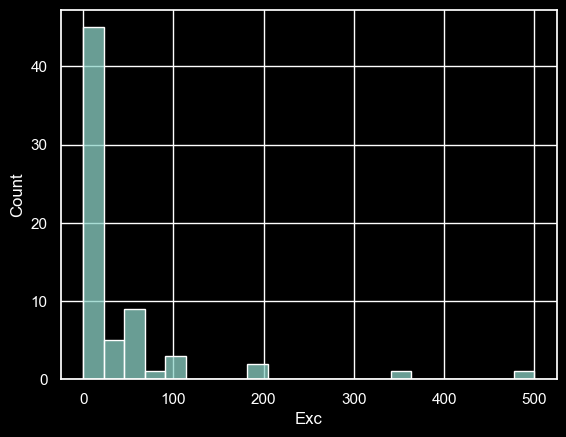

In [107]:
sns.histplot(df["Exc"])


<Axes: xlabel='lacar', ylabel='Count'>

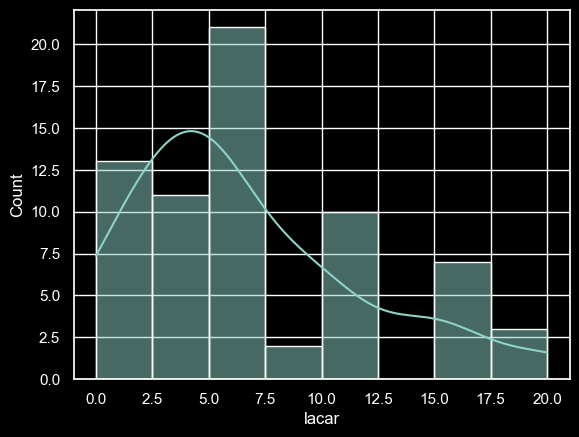

In [108]:
sns.histplot(df["lacar"], kde=True)

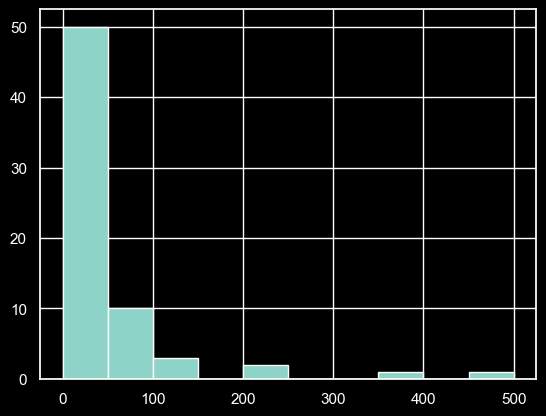

In [109]:
a=df["Exc"]
plt.hist(a, histtype='bar', rwidth=1)
plt.show()

In these plotting's, we have observed that many people tend to switch cab services due to extra charges and safety concerns. This trend is particularly noticeable among females who prioritize safety, leading them to switch to other services such as Ola or Uber, even if it means waiting longer or paying extra for waiting time. , during the booking process, almost everyone reported experiencing long waiting times for the cab to arrive. Some drivers also take longer routes to reach the destination, and during conversations with drivers, some encourage passengers to pay in cash instead of online. If the passenger declines to pay in cash, the drivers' behavior can make passengers feel unsafe.


# Statistical analysis

In [110]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

In [111]:
np.mean(df)

C:\Users\anupa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\anupa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Age         24.402985
Ge           0.343284
Avscp     1104.328358
Dculm        2.865672
lacar        6.597015
osp          4.925373
ocs          2.597015
cstu         1.074627
tpsc        37.328358
overlm       5.835821
Exc         35.358209
Safety       1.582090
Drbe         3.253731
Swpo         0.671642
which        1.104478
Convcd       1.492537
Dedl         3.223881
Cshdex       2.492537
online       4.865672
prfu         0.328358
Dwelt        0.880597
dtype: float64

In [112]:
df.median()

C:\Users\anupa\AppData\Local\Temp\ipykernel_3960\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        24.0
Ge          0.0
Avscp     500.0
Dculm       3.0
lacar       5.0
osp         3.0
ocs         3.0
cstu        1.0
tpsc       30.0
overlm      3.0
Exc         0.0
Safety      2.0
Drbe        3.0
Swpo        1.0
which       1.0
Convcd      2.0
Dedl        4.0
Cshdex      3.0
online      3.0
prfu        0.0
Dwelt       1.0
dtype: float64

In [113]:
np.std(df)

C:\Users\anupa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Age          2.498117
Ge           0.474805
Avscp     1490.597620
Dculm        1.573052
lacar        5.110889
osp          5.867475
ocs          1.506798
cstu         0.919335
tpsc        28.991707
overlm      12.199336
Exc         80.827567
Safety       0.813125
Drbe         0.816678
Swpo         0.469616
which        0.775258
Convcd       0.582663
Dedl         0.989812
Cshdex       0.760462
online       6.938742
prfu         0.469616
Dwelt        0.889783
dtype: float64

In [114]:
print(df.corr()) 

            Age         Ge     Avscp     Dculm     lacar       osp       ocs  \
Age     1.000000  0.059536  0.020174 -0.236901 -0.000140 -0.100793  0.039178   
Ge      0.059536  1.000000  0.000009 -0.138093 -0.102907 -0.033664 -0.036119   
Avscp   0.020174  0.000009  1.000000  0.221762  0.236444  0.443547 -0.125881   
Dculm  -0.236901 -0.138093  0.221762  1.000000  0.221611  0.102407 -0.123589   
lacar  -0.000140 -0.102907  0.236444  0.221611  1.000000  0.509649  0.068065   
osp    -0.100793 -0.033664  0.443547  0.102407  0.509649  1.000000 -0.092875   
ocs     0.039178 -0.036119 -0.125881 -0.123589  0.068065 -0.092875  1.000000   
cstu   -0.071585 -0.092882  0.001943 -0.024030  0.206523  0.037003 -0.086035   
tpsc   -0.143817 -0.069992  0.326212  0.176385  0.076641  0.258277 -0.031820   
overlm -0.096759 -0.142299  0.455344 -0.035371  0.227070  0.699189  0.032939   
Exc    -0.319230 -0.033539 -0.062833 -0.009600  0.006383  0.106366  0.083538   
Safety  0.141691  0.100975 -0.227429 -0.

C:\Users\anupa\AppData\Local\Temp\ipykernel_3960\1781666822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [115]:
df.describe()

,Age,Ge,Avscp,Dculm,lacar,osp,ocs,cstu,tpsc,overlm,...,Safety,Drbe,Swpo,which,Convcd,Dedl,Cshdex,online,prfu,Dwelt
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,24.402985,0.343284,1104.328358,2.865672,6.597015,4.925373,2.597015,1.074627,37.328358,5.835821,...,1.582090,3.253731,0.671642,1.104478,1.492537,3.223881,2.492537,4.865672,0.328358,0.880597
std,2.516971,0.478389,1501.847573,1.584924,5.149462,5.911759,1.518170,0.926274,29.210515,12.291407,...,0.819262,0.822842,0.473160,0.781109,0.587061,0.997283,0.766201,6.991110,0.473160,0.896498
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,300.000000,2.000000,3.000000,2.000000,1.000000,0.000000,10.000000,1.000000,...,1.000000,3.000000,0.000000,0.500000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000
50%,24.000000,0.000000,500.000000,3.000000,5.000000,3.000000,3.000000,1.000000,30.000000,3.000000,...,2.000000,3.000000,1.000000,1.000000,2.000000,4.000000,3.000000,3.000000,0.000000,1.000000
75%,25.000000,1.000000,1000.000000,3.000000,10.000000,5.500000,4.000000,2.000000,60.000000,4.500000,...,2.000000,4.000000,1.000000,2.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.000000
max,36.000000,1.000000,8000.000000,9.000000,20.000000,30.000000,4.000000,2.000000,98.000000,80.000000,...,3.000000,5.000000,1.000000,2.000000,2.000000,4.000000,4.000000,40.000000,1.000000,2.000000


# Hypothesis testing

# Female

In [116]:
Female=df["Ge"]

In [117]:
fem=list(filter(lambda Female:Female == 0,df["Ge"]))

In [118]:
print(fem)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [119]:
sample2=df["Safety"]

In [120]:
print(sample2)

0     0
1     1
2     1
3     2
4     0
     ..
62    0
63    2
64    1
65    2
66    2
Name: Safety, Length: 67, dtype: int32


In [121]:
t_stat, p_value = ttest_ind(fem, sample2)
print("T-statistic value: ", t_stat)  
print()
print("P-Value: ", p_value)

T-statistic value:  -12.789454310882133

P-Value:  1.980276118145975e-23


In this case, since the t-statistic value is negative -12.789 and the p-value is 1.9802 is not less than the alpha value of 0.05, we would fail to reject the null hypothesis (H0).

The result is significant difference.

This means that there is difference between and female and safety no being tested is significantly different from the hypothesized value.

Means Famles are felling more unsafe while travelling in cab

# Male

In [122]:
Male=df["Ge"]

In [123]:
mal=list(filter(lambda Male:Male == 1,df["Ge"]))

In [124]:
print(mal)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [125]:
t_stat, p_value = ttest_ind(mal, sample2)
print("T-statistic value: ", t_stat) 
print()
print("P-Value: ", p_value)

T-statistic value:  -3.3948192652431093

P-Value:  0.001031900739352869


C:\Users\anupa\AppData\Local\Temp\ipykernel_3960\2466715855.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(mal, sample2)


alpha value 0.05 and t-statistics value -3.3948 and p value is 0.001031

In this case, since the t-statistic value is negative (-3.3948) and the p-value (0.001031) is less than the alpha value of 0.05, we would reject the null hypothesis (H0) in favor of the alternative hypothesis (H1).

There is a significant difference.

Means Males are little confromatable while travelling in cab

# 2

In [126]:
print(df["overlm"])

0     12
1      9
2     52
3      5
4      7
      ..
62     3
63     0
64     5
65     4
66     2
Name: overlm, Length: 67, dtype: int64


In [127]:
print(df["osp"])

0      8
1      6
2     25
3      5
4      6
      ..
62     2
63     4
64     2
65     3
66     2
Name: osp, Length: 67, dtype: int64


In [128]:
sample3=df["overlm"]

In [129]:
sample4=df["osp"]

In [130]:
t_stat, p_value = ttest_ind(sample3, sample4)
print("T-statistic value: ", t_stat)  
print()
print("P-Value: ", p_value)

T-statistic value:  0.5463912735106782

P-Value:  0.5857193736198945


In this case, since the t-statistic value is positive 0.546391 and the p-value 0.5857193)is greater than the alpha value of 0.05 so we accepting null hypothesis and we rejecting atrenative hypothesis.

the results are not considered statistically significant.

So here over changring in last one month and surge pricing in the last month both are independent on each other.

# 3

Have you ever had a conversation with a cab driver about their experience and challenges as a driver in Bangalore?  Convcd
On average, how many times cab drivers asked to pay cash not online payment ? Online

In [131]:
print(df["Convcd"])

0     2
1     2
2     2
3     1
4     1
     ..
62    2
63    1
64    1
65    1
66    2
Name: Convcd, Length: 67, dtype: int32


In [132]:
print(df["online"])

0     20
1     24
2      6
3      6
4      4
      ..
62     4
63     0
64     5
65    12
66     3
Name: online, Length: 67, dtype: int64


In [133]:
sample5=df["Convcd"]

In [134]:
sample6=df["online"]

In [135]:
t_stat, p_value = ttest_ind(sample5, sample6)
print("T-statistic value: ", t_stat) 
print()
print("P-Value: ", p_value)

T-statistic value:  -3.935492379633842

P-Value:  0.00013362449941918246


In this case, since the t-statistic value is negative -3.93549 and the p-value 0.0001336 is less than the alpha value of 0.05, so here we rejecting null hypothesis.the results are considered statistically significant.

there is a difference between conversation with a cab driver about their experience and challenges as a driver in Bangalore and cab drivers asked to pay cash not online payment.

# Hypothesis testing on c1 and c2

# 4

In [136]:
print(df["Swpo"])

0     1
1     1
2     1
3     1
4     1
     ..
62    1
63    0
64    1
65    1
66    1
Name: Swpo, Length: 67, dtype: int32


In [137]:
print(df["which"])

0     1
1     0
2     2
3     0
4     2
     ..
62    1
63    2
64    1
65    1
66    1
Name: which, Length: 67, dtype: int32


In [138]:
c1=df["which"]

In [139]:
c1 = list(filter(lambda c1:c1 == 0,c1))

In [140]:
print(c1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [141]:
c2=df["which"]

In [142]:
c2=list(filter(lambda c2:c2 == 2, c2))

In [143]:
print(c2)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [144]:
other = df["which"]

In [145]:
OTHER = list(filter(lambda other:other==1,other))

In [146]:
print(OTHER)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Comapny1 (C1)

In [147]:
sample7=df["Swpo"]

In [148]:
sample8=c1

In [149]:
t_stat, p_value = ttest_ind(sample7, sample8)
print("T-statistic value: ", t_stat) 
print()
print("P-Value: ", p_value)

T-statistic value:  5.826217056959447

P-Value:  1.0734872998626255e-07


In this case, since the t-statistic value is positive 5.82621 and the p-value 1.073 is greater than the alpha value of 0.05 so we accepting null hypothesis and we rejecting atrenative hypothesis.

the results are not considered statistically significant.

So here witched to a different cab service due to their policies regarding delays and extra charges with service is switch to c1. to other company

# Company 2 (C2)

In [150]:
sample9=c2

In [151]:
t_stat, p_value = ttest_ind(sample7, sample9)
print("T-statistic value: ", t_stat) 
print()
print("P-Value: ", p_value)

T-statistic value:  -13.704157376647768

P-Value:  1.2000944156753074e-23


C:\Users\anupa\AppData\Local\Temp\ipykernel_3960\3960993914.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(sample7, sample9)


# OTHER

In [152]:
sample10=OTHER

In [153]:
t_stat, p_value = ttest_ind(sample7, sample10)
print("T-statistic value: ", t_stat) 
print()
print("P-Value: ", p_value)

T-statistic value:  -3.5267199892981536

P-Value:  0.0006613427929555167


C:\Users\anupa\AppData\Local\Temp\ipykernel_3960\2698022397.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(sample7, sample10)


In this case, since the t-statistic value is negative -3.5267199 and the p-value 0.00066134 is less than the alpha value of 0.05, so here we rejecting null hypothesis.the results are considered statistically significant.

there is a difference between witched to a different cab service due to their policies regarding delays and extra charges with service is switch to UBER to other compnay.

1
This means that there is difference between and female and safety no being tested is significantly different from the hypothesized value.Means Famles are felling more unsafe while travelling in cab. Male are There is a significant difference. Means Males are little confromatable while travelling in cab

2
In this case, since the t-statistic value is positive 0.546391 and the p-value 0.5857193)is greater than the alpha value of 0.05 so we accepting null hypothesis and we rejecting atrenative hypothesis. the results are not considered statistically significant. So here over changring in last one month and surge pricing in the last month both are independent on each other.

3
the results are considered statistically significant. there is a difference between conversation with a cab driver about their experience and challenges as a driver in Bangalore and cab drivers asked to pay cash not online payment.

4
#C1

the results are not considered statistically significant. So here witched to a different cab service due to their policies regarding delays and extra charges with service is switch to c1. to other company

#c2

the results are not considered statistically significant. So here witched to a different cab service due to their policies regarding delays and extra charges with service is switch to c2 to other compnay

#other

the results are considered statistically significant. there is a difference between witched to a different cab service due to their policies regarding delays and extra charges with service is switch to c2 to other compnay.